In [1]:
from sklearn.externals import joblib
import pandas as pd
import numpy as np
import tools
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import glob

# step 1: grab activity files

In [2]:
ls_paths = glob.glob('annotated_data/event/activity/*')
print "number of activity files", len(ls_paths)

number of activity files 89


In [3]:
ls_csvs = map(lambda x: pd.read_csv(x, delimiter=',').drop(['Unnamed: 0', 'ts', 'gyroX', 'gyroY', 'gyroZ', "label", 'corresponding_file'], axis = 1), ls_paths)
ls_csvs = map(lambda x: x.fillna(method='ffill').dropna(), ls_csvs)

In [4]:
ls_collections_activity = []

for csv in ls_csvs:
    _, ls_events = tools.detect_events(100, csv, 0, 0, 60)
    for event in ls_events:
    
        event['class'] = 'activity'
    
    master_df = pd.DataFrame(np.vstack(ls_events))
    master_df.columns = ls_events[0].columns
    
    ls_collections_activity.append(master_df)

identified event at  141
identified event at  363
identified event at  779
identified event at  994
identified event at  1209
identified event at  1425
identified event at  1625
identified event at  1837
identified event at  2068
number of events:  9
identified event at  165
identified event at  347
identified event at  985
identified event at  1206
identified event at  1416
identified event at  1628
identified event at  1848
number of events:  7
identified event at  578
identified event at  999
identified event at  1209
identified event at  1417
identified event at  1623
identified event at  1848
identified event at  2055
number of events:  7
identified event at  564
identified event at  781
identified event at  993
identified event at  1415
identified event at  2064
number of events:  5
identified event at  145
identified event at  361
identified event at  572
identified event at  986
identified event at  1210
identified event at  1425
identified event at  1639
identified event at  1

In [5]:
activity_collections_df = pd.DataFrame(np.vstack(ls_collections_activity))
activity_collections_df.shape

(49140, 104)

In [ ]:
# visual inspection
plt.plot(ls_events[1]['magnitude'])
plt.title('gesture recognition')
plt.xlabel('time (in ms)')
plt.ylabel('magnitude')

# step 2: grab non-activities

In [7]:
ls_paths = glob.glob('annotated_data/event/none/*')
print "number of activity files", len(ls_paths)

number of activity files 53


In [8]:
ls_csvs = map(lambda x: pd.read_csv(x, delimiter=',').drop(['Unnamed: 0', 'ts', 'gyroX', 'gyroY', 'gyroZ', "label", 'corresponding_file'], axis = 1), ls_paths)
ls_csvs = map(lambda x: x.fillna(method='ffill').dropna(), ls_csvs)

In [9]:
ls_collections_none = []

for csv in ls_csvs:
    _, ls_events = tools.detect_events(100, csv, 0, 0, 60)
    
    if (len(ls_events) > 0): # if no events are detected, then move on
    
        for event in ls_events:

            event['class'] = 'none'

        master_df = pd.DataFrame(np.vstack(ls_events))
        master_df.columns = ls_events[0].columns
        
    else:
        continue
    
    ls_collections_none.append(master_df)

identified event at  162
identified event at  352
identified event at  477
identified event at  564
identified event at  638
identified event at  781
identified event at  941
identified event at  1012
identified event at  1483
number of events:  9
identified event at  124
identified event at  187
identified event at  441
identified event at  579
identified event at  747
identified event at  2053
number of events:  6
identified event at  453
identified event at  1757
identified event at  2119
number of events:  3
identified event at  307
identified event at  405
identified event at  575
identified event at  663
identified event at  917
identified event at  1755
identified event at  2055
identified event at  2312
number of events:  8
identified event at  651
identified event at  1974
number of events:  2
identified event at  813
identified event at  979
identified event at  1938
number of events:  3
identified event at  256
identified event at  335
identified event at  917
identified eve

In [10]:
none_collections_df = pd.DataFrame(np.vstack(ls_collections_none))
none_collections_df.shape

(15000, 104)

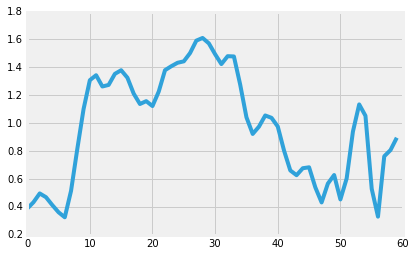

In [11]:
# visual inspection
plt.plot(ls_events[0]['magnitude'])
plt.title

# step 3: prepare data for fitting

In [12]:
master_df = pd.concat([none_collections_df, activity_collections_df], axis = 0)
master_df.shape

(64140, 104)

In [13]:
master_df.columns = list(ls_csvs[0].columns) + ['class']
master_df.head()

,accX,accY,accZ,gravX,gravY,gravZ,time_body_accX_mean,time_body_accY_mean,time_body_accZ_mean,time_body_accX_std,...,magnitude_change,magnitude_jerk,magnitude_energy,body_magnitude_energy,gravity_magnitude_energy,body_magnitude_jerk_energy,magnitude_entropy,body_magnitude_entropy,gravity_magnitude_entropy,class
0,0.405819,-0.76894,0.237641,2.806,1.1643,-8.77676,0.511577,-0.217772,-0.0443636,0.168064,...,0.281427,1.82788,0.650583,4.1777,346.8,1.0885,1.34725,1.37467,1.38627,none
1,0.441127,0.0832726,0.415463,2.95304,1.19206,-8.63827,0.516465,-0.453551,0.0858592,0.164827,...,0.386662,0.801367,1.05404,3.30952,346.595,1.03515,1.34152,1.35781,1.38627,none
2,0.373182,-0.158188,0.184795,3.07744,1.13933,-8.57668,0.419362,-0.488907,0.210106,0.0375527,...,0.265865,0.974488,1.41942,2.83019,342.929,1.60414,1.36679,1.31946,1.38627,none
3,0.192572,0.020859,-0.701051,3.14163,1.14628,-8.81036,0.353175,-0.205749,0.0342122,0.110605,...,-0.147602,1.24515,1.4182,1.914,344.156,0.693123,1.36655,1.35513,1.38624,none
4,0.920454,0.916297,-1.45299,3.44845,1.45171,-9.29469,0.481834,0.21556,-0.388446,0.310656,...,-0.03731,2.10114,1.53661,4.89958,358.286,2.43571,1.36673,1.20804,1.38566,none


In [14]:
X = master_df.drop('class', axis = 1)
y = master_df['class']
y.value_counts()

activity    49140
none        15000
Name: class, dtype: int64

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape

((51312, 103), (51312,))

In [16]:
from sklearn.linear_model import LogisticRegression


model_lr = LogisticRegression(penalty='l1')

from sklearn.cross_validation import cross_val_score
print cross_val_score(model_lr, X_train, y_train)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix

model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)
print confusion_matrix(y_test, pred)

In [ ]:
from sklearn.metrics import classification_report
print classification_report(y_test, pred)

In [ ]:
from sklearn.externals import joblib
joblib.dump(model_lr, 'models/event_filter/event_filter.pkl') 